Mean: 46.66 km/h
Median: 45.00 km/h
Min: 31.0 km/h, Max: 100.0 km/h
Standard Deviation: 11.84 km/h
Probability of wind gust exceeding 80 km/h: 1.35%


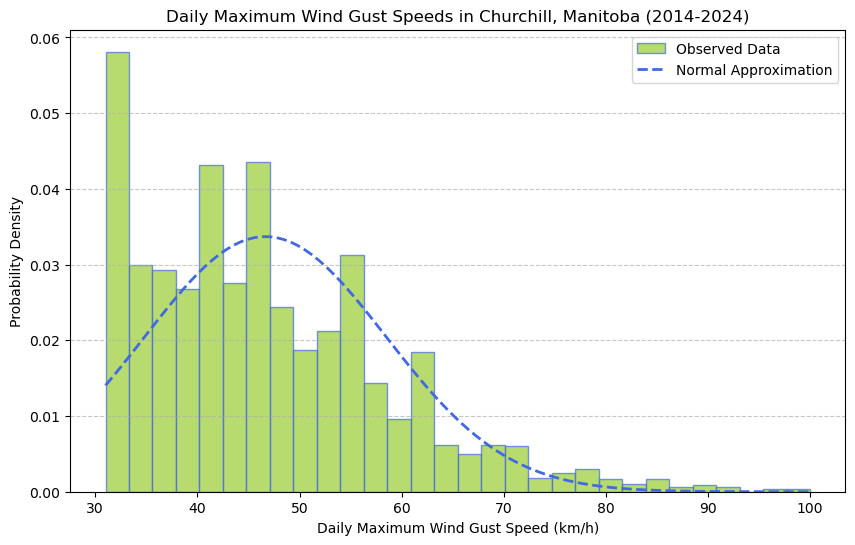

Trend: Wind speeds are decreasing by -0.21 km/h per year


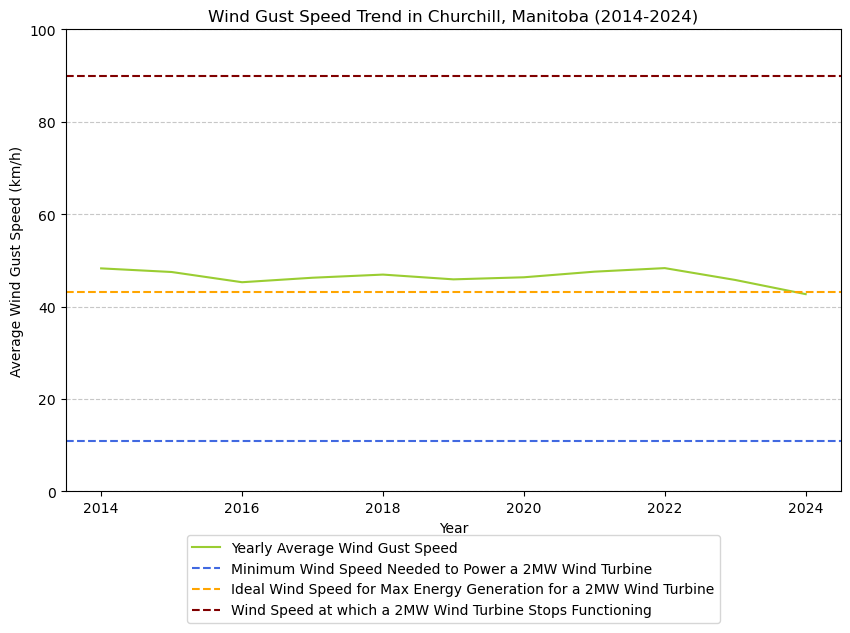

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# file paths for 2014-2024
windpower = [
    "en_climate_daily_MB_5060605_2024_P1D.csv",
    "en_climate_daily_MB_5060595_2023_P1D.csv",
    "en_climate_daily_MB_5060595_2022_P1D.csv",
    "en_climate_daily_MB_5060595_2021_P1D.csv",
    "en_climate_daily_MB_5060595_2020_P1D.csv",
    "en_climate_daily_MB_5060595_2019_P1D.csv",
    "en_climate_daily_MB_5060595_2018_P1D.csv",
    "en_climate_daily_MB_5060595_2017_P1D.csv",
    "en_climate_daily_MB_5060595_2016_P1D.csv",
    "en_climate_daily_MB_5060595_2015_P1D.csv",
    "en_climate_daily_MB_5060595_2014_P1D.csv"
]

# read data
dfs = [pd.read_csv(file) for file in windpower]
df = pd.concat(dfs, ignore_index=True)

# convert columns to correct types
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Spd of Max Gust (km/h)'] = pd.to_numeric(df['Spd of Max Gust (km/h)'], errors='coerce')

# drop missing values
df_clean = df[['Date/Time', 'Spd of Max Gust (km/h)']].dropna()

# extract data values
data = df_clean['Spd of Max Gust (km/h)']

# stats
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data, ddof=1)  
min_speed = np.min(data)
max_speed = np.max(data)

print(f"Mean: {mean:.2f} km/h")
print(f"Median: {median:.2f} km/h")
print(f"Min: {min_speed} km/h, Max: {max_speed} km/h")
print(f"Standard Deviation: {std_dev:.2f} km/h")


# probability of the thing
threshold = 80
n = 2600
probability_extreme = np.sum(data > threshold) / n

print(f"Probability of wind gust exceeding {threshold} km/h: {probability_extreme:.2%}")


# hist and the thing
bins = 30
hist_values, bin_edges = np.histogram(data, bins=bins, density=True)

# the thing and standev
x = np.linspace(np.min(data), np.max(data), 100)
normal_curve = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

#plot graph
plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, color='yellowgreen', edgecolor='royalblue', alpha=0.7, density=True, label="Observed Data")
plt.plot(x, normal_curve, color='royalblue', linestyle='--', linewidth=2, label="Normal Approximation")
plt.xlabel("Daily Maximum Wind Gust Speed (km/h)")
plt.ylabel("Probability Density")
plt.title("Daily Maximum Wind Gust Speeds in Churchill, Manitoba (2014-2024)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# linear Approximation (grep this sucks)
df_clean['Year'] = df_clean['Date/Time'].dt.year
yearly_avg = df_clean.groupby('Year')['Spd of Max Gust (km/h)'].mean().reset_index()

# linear regression
x_years = yearly_avg['Year'].values
y_speeds = yearly_avg['Spd of Max Gust (km/h)'].values

x_mean, y_mean = np.mean(x_years), np.mean(y_speeds)
slope = np.sum((x_years - x_mean) * (y_speeds - y_mean)) / np.sum((x_years - x_mean) ** 2)
intercept = y_mean - slope * x_mean

print(f"Trend: Wind speeds are {'increasing' if slope > 0 else 'decreasing'} by {slope:.2f} km/h per year")

# plot graph
plt.figure(figsize=(10, 6))
plt.plot(x_years, y_speeds, color='yellowgreen', label="Yearly Average Wind Gust Speed")
plt.axhline(y = 10.8, color = 'royalblue', linestyle='--', label="Minimum Wind Speed Needed to Power a 2MW Wind Turbine")
plt.axhline(y = 43.2, color = 'orange', linestyle='--', label="Ideal Wind Speed for Max Energy Generation for a 2MW Wind Turbine")
plt.axhline(y = 90, color = 'maroon', linestyle='--', label="Wind Speed at which a 2MW Wind Turbine Stops Functioning")

plt.xlabel("Year")
plt.ylabel("Average Wind Gust Speed (km/h)")
plt.title("Wind Gust Speed Trend in Churchill, Manitoba (2014-2024)")
plt.ylim (0,100)
plt.legend(bbox_to_anchor=(0.5,-0.3), loc='lower center')



plt.grid(axis='y', linestyle='--', alpha=0.7)
#this is the worst thing ive ever done. greg if you read this i have so many regrets in my life and staying up til 3am to code is one of them
plt.show()
